## Introduction

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import seaborn as sns
from datetime import datetime

In [2]:
times = pd.read_csv("tute1.csv")
data= times.rename(columns={'Unnamed: 0': 'Date'})
data.head(5)

,Date,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


### Convert Month

In [3]:
import datetime

tanggal='%b-%y'
Month=datetime.datetime.strptime('Sep-81', tanggal)
Month.strftime('%m-%y')

'09-81'

In [0]:
data['Date']=data['Date'].apply(lambda x: datetime.datetime.strptime(x, tanggal))

In [5]:
data.head()

,Date,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


In [0]:
dataSales=pd.DataFrame(data,columns=['Date','Sales'])

In [7]:
dataSales.head()

,Date,Sales
0,1981-03-01,1020.2
1,1981-06-01,889.2
2,1981-09-01,795.0
3,1981-12-01,1003.9
4,1982-03-01,1057.7


### Plot Graph

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


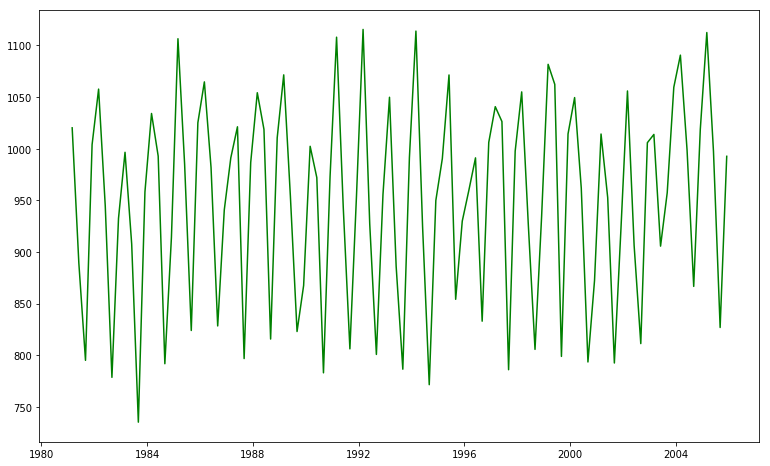

In [8]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0, 0, 1, 1])

ax1.plot(dataSales['Date'],
         dataSales['Sales'],
         color='green')

plt.show()


## Checking Stationer Data

### Determining Rolling Statistics

In [0]:
indexedDataSales=dataSales.set_index(['Date'])

In [10]:
rolmean = indexedDataSales.rolling(window=12).mean()

rolstd = indexedDataSales.rolling(window=12).std()
print(rolmean, rolstd)

                 Sales
Date                  
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01 

### Plot Rolling Statistics

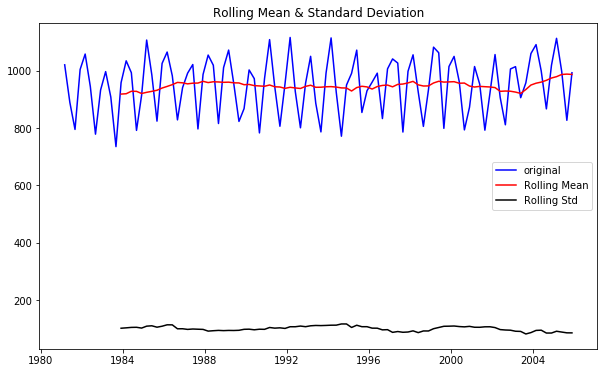

In [11]:
orig = plt.plot(indexedDataSales, color='blue',label='original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Based on the graph, we can see that rolling mean have the same means and rolling of variance have the same variance, it means that this data is **stationer**.

### Perform Dickey-Fuller Test

In [12]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
dftest=adfuller(indexedDataSales['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -3.262755
p-value                        0.016628
#Lags Used                     9.000000
Number of Observation Used    90.000000
Critical Value (1%)           -3.505190
Critical Value (5%)           -2.894232
Critical Value (10%)          -2.584210
dtype: float64


Ho = Data is Stationer. Based on the p-value we can see that the p-value of this data is 0.016628 < sig 0.05. It means that Ho is accepted so Data is **Stationer.**

## Estimating Trend

Estimating Trend will shows a plot graph in Log.

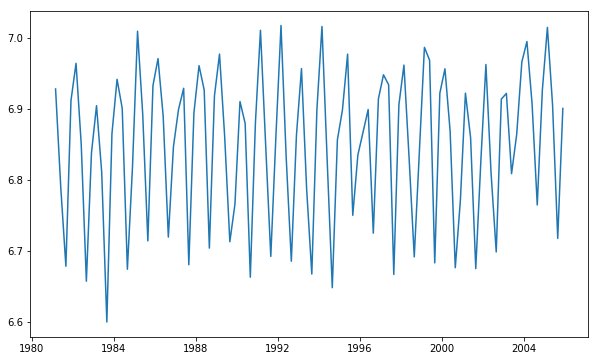

In [13]:
indexedDataSales_logScale = np.log(indexedDataSales)
plt.plot(indexedDataSales_logScale)

Based on the graph, we can see that the data have a good trend because it have the same area in highest or lower point.

## Moving Average

To make a data for having a better trend, we need to make moving average. So the data didnt have far moving for another data and it will look constant to make a better model.

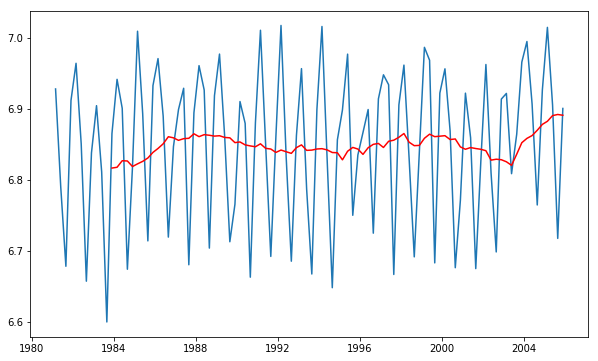

In [15]:
movingAverage = indexedDataSales_logScale.rolling(window=12).mean()
movingSTD = indexedDataSales_logScale.rolling(window=12).std()
plt.plot(indexedDataSales_logScale)
plt.plot(movingAverage, color='red')

a blue line is the real data, and the red line is the moving average. From that graph we can knew the different between the moving average line and the real data line. Moving average line looks more constant with a lower different on a data from the earlier years to the next year then.

In [16]:
dataSalesLogScaleMinusMovingAverage = indexedDataSales_logScale - movingAverage
dataSalesLogScaleMinusMovingAverage.head()

,Sales
Date,
1981-03-01,NaN
1981-06-01,NaN
1981-09-01,NaN
1981-12-01,NaN
1982-03-01,NaN


There was a NaN data that needs no be filled or to drop it from the dataset to make a better model.

### Remove Nan Values

In [17]:
dataSalesLogScaleMinusMovingAverage.dropna(inplace=True)
dataSalesLogScaleMinusMovingAverage.head()

,Sales
Date,
1983-12-01,0.048467
1984-03-01,0.123673
1984-06-01,0.073732
1984-09-01,-0.152268
1984-12-01,-0.000601


### Rolling Statistics of Moving Average

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determining Rolling Statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  #Plot Rolling Statistics
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)
  
  #Perform Dickey-Fuller test:
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Sales'], autolag="AIC")
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lag Used', 'Number of Observation Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)

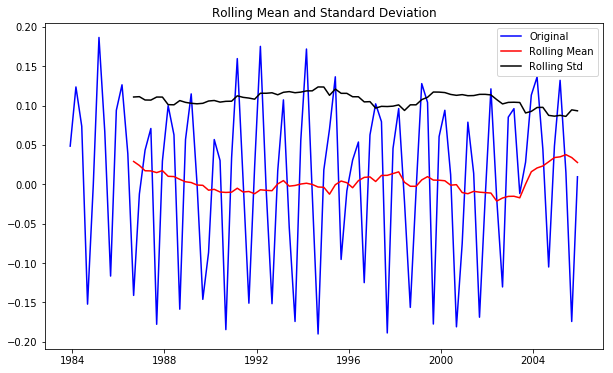

Result of Dickey-Fuller Test:
Test Statistic                -3.821558
p-value                        0.002694
#Lag Used                      9.000000
Number of Observation Used    79.000000
Critical Value (1%)           -3.515977
Critical Value (5%)           -2.898886
Critical Value (10%)          -2.586694
dtype: float64


In [19]:
test_stationarity(dataSalesLogScaleMinusMovingAverage)

Based on the graph, we can see that moving average can make data more stationer because 
- Means and Variance is changing to log. 
- p-value is getting higher than the p-value on real data from 0.016628 changing to 0.002694. Which is means that the p-value from the real data and from Moving Average is higher that 0.5. It mens that Ho is Accepted and Data is Stationer.


## Data Interpretation

Data that have beeing log, is need to be changing again to the real data for data interpretation.


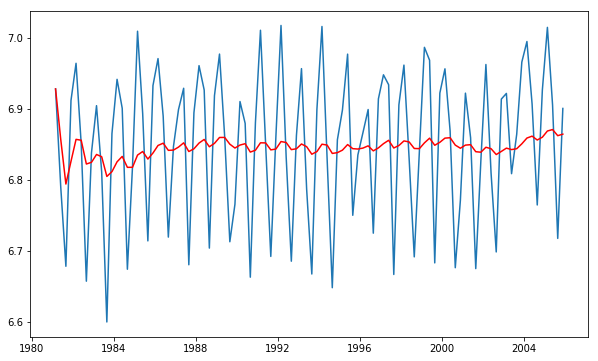

In [20]:
exponentialDecayWeightedAverage = indexedDataSales_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataSales_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

Based on the graph we can see 

- Red line is the moving average of data.
- Blue line is the data who is changing to log.

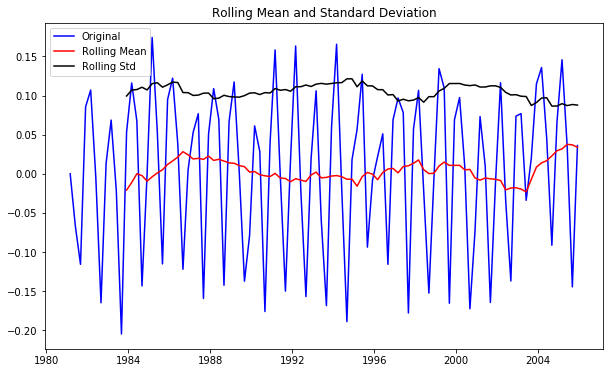

Result of Dickey-Fuller Test:
Test Statistic                -3.266556
p-value                        0.016441
#Lag Used                      8.000000
Number of Observation Used    91.000000
Critical Value (1%)           -3.504343
Critical Value (5%)           -2.893866
Critical Value (10%)          -2.584015
dtype: float64


In [21]:
#data logaritma - data exponentian moving average

dataSalesLogScaleMinusMovingExponentialDecayAverage = indexedDataSales_logScale - exponentialDecayWeightedAverage
test_stationarity(dataSalesLogScaleMinusMovingExponentialDecayAverage)

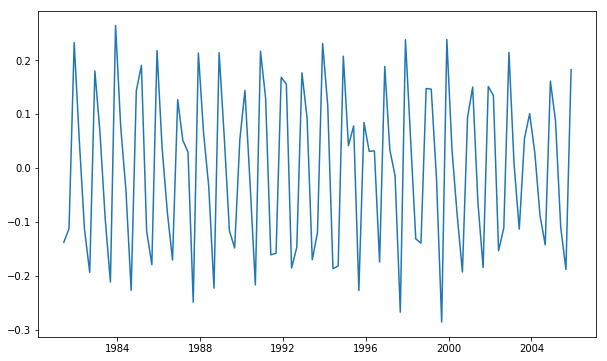

In [23]:
dataSalesLogDiffShifting = indexedDataSales_logScale - indexedDataSales_logScale.shift()
plt.plot(dataSalesLogDiffShifting)

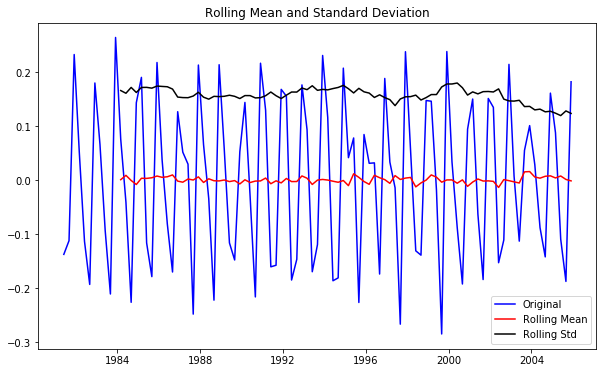

Result of Dickey-Fuller Test:
Test Statistic                -5.098185
p-value                        0.000014
#Lag Used                     10.000000
Number of Observation Used    88.000000
Critical Value (1%)           -3.506944
Critical Value (5%)           -2.894990
Critical Value (10%)          -2.584615
dtype: float64


In [24]:
dataSalesLogDiffShifting.dropna(inplace=True)
test_stationarity(dataSalesLogDiffShifting)

The graph is show us that the data is changing from log the real data

## Data Decomposition

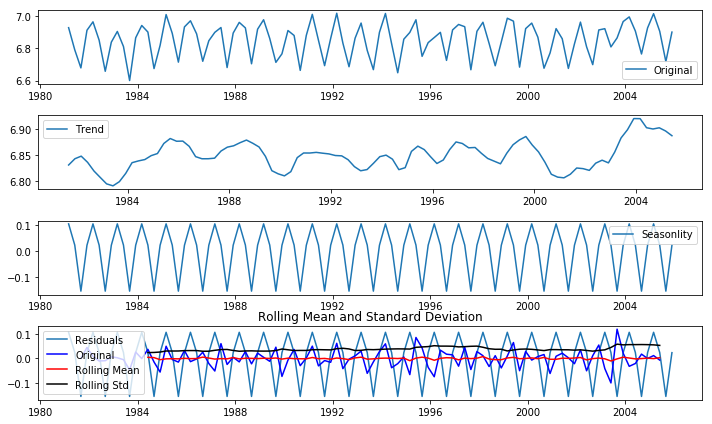

Result of Dickey-Fuller Test:
Test Statistic               -6.204835e+00
p-value                       5.690975e-08
#Lag Used                     8.000000e+00
Number of Observation Used    8.700000e+01
Critical Value (1%)          -3.507853e+00
Critical Value (5%)          -2.895382e+00
Critical Value (10%)         -2.584824e+00
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataSales_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataSales_logScale, label='Original') 
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend') 
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonlity') 
plt.legend(loc='best')
plt.subplot(414)
plt.plot(seasonal, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

**Original**  is show a real data in log.

**Trend** is show us the data like a data in moving average

**Seasonal*** is show us the data if it changing to seasonal data which each season is consist of four years

The last one is graph of a real data with rolling mean, rolling variance and residuals which show us that the data is in a stationer condition.

## Dekomposisi Residual

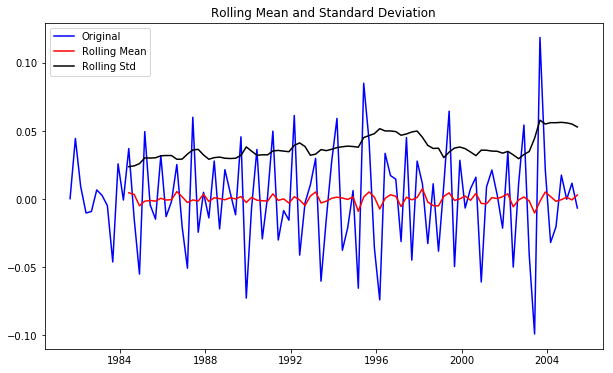

Result of Dickey-Fuller Test:
Test Statistic               -6.204835e+00
p-value                       5.690975e-08
#Lag Used                     8.000000e+00
Number of Observation Used    8.700000e+01
Critical Value (1%)          -3.507853e+00
Critical Value (5%)          -2.895382e+00
Critical Value (10%)         -2.584824e+00
dtype: float64


In [26]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

## ACF and PACF plots

ARIMA algorithm is used for this time series data, so in this part will telling more about ACF and PACF plot which is used in ARIMA.

In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataSalesLogDiffShifting, nlags=20)
lag_pacf = pacf(dataSalesLogDiffShifting, nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


### Plot ACF

Plot ACF will show us how the data if it looks from AR

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

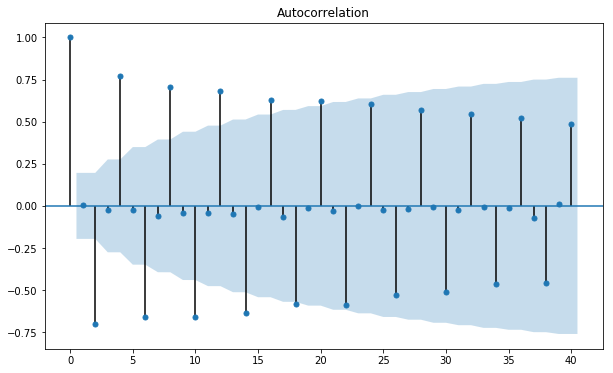

In [29]:
sm.graphics.tsa.plot_acf(dataSales.Sales.values.squeeze(), lags=40)
plt.show()

Plot ACF Tails Off which can be a parameter of MA is a leg after cut off in the second leg. This parameter can be used because the graph show us the tails off.

### Plot PACF

Plot PACF will show us how the data if it looks from MA

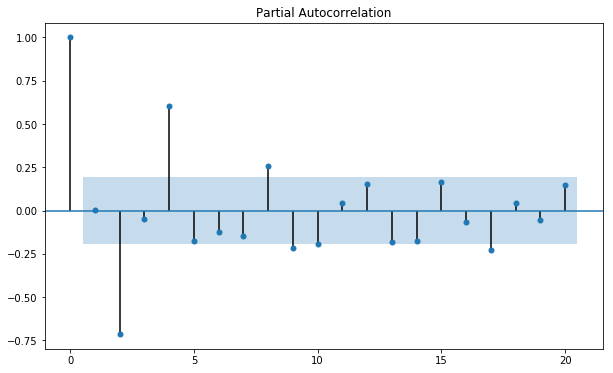

In [44]:
sm.graphics.tsa.plot_pacf(dataSales.Sales.values.squeeze(), lags=20)
plt.show()

The Graph show that the ACPF is cuts off after the fourth leg which not crossing the interval.

## ARIMA Model

This is the part for building the ARIMA models. This model used order=(4,0,0) because the data show us that only PACF that can be used for modelling because it cut off in the plot parameter.

Plotting ARIMA model


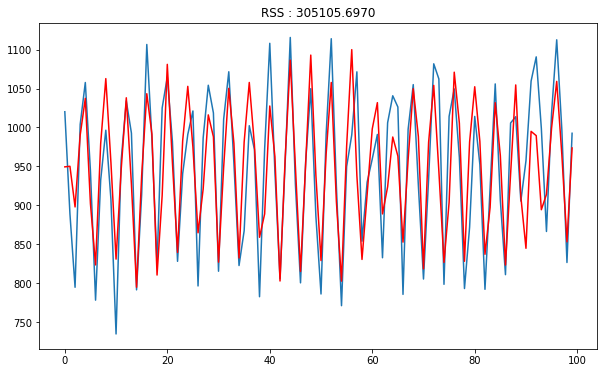

In [45]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(dataSales.Sales, order=(4,0,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataSales.Sales)
plt.plot(results_ARIMA.fittedvalues, color='red') #mmencari prediksi dari model 4.0.0
plt.title('RSS : %.4f'% sum((results_ARIMA.fittedvalues-dataSales['Sales'])**2))
print('Plotting ARIMA model')

That models show us that the real data and the prediction data is not too far away, so we can used this data.
- Red line is a data predictionmerah prediksi
- Blue line is the real data

### Mean Absolute Error

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataSales.Sales, results_ARIMA.fittedvalues)

45.31842059145924

Error of the data  based on MAE with ARIMA 4,0,0 model is 45.31842059145924 which is good because its far away from the amount of the data.

## Prediction

In [47]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

0     949.490022
1     950.226125
2     898.070336
3     990.241568
4    1037.377914
dtype: float64


This is the prediction in a real Sales amount

### Convert to Cumulative Sum

In [48]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

0     949.490022
1    1899.716147
2    2797.786483
3    3788.028051
4    4825.405966
dtype: float64


In [49]:
predictions_ARIMA_log = pd.Series(indexedDataSales_logScale['Sales'].ix[0], index=indexedDataSales_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1981-03-01    6.927754
1981-06-01    6.927754
1981-09-01    6.927754
1981-12-01    6.927754
1982-03-01    6.927754
dtype: float64

This is the prediction in log with showing the Dates.

### Data Log Scale

In [42]:
indexedDataSales_logScale.head()

,Sales
Date,
1981-03-01,6.927754
1981-06-01,6.790322
1981-09-01,6.678342
1981-12-01,6.911648
1982-03-01,6.963852


This is the data head that shown by the log scale

### Result of Prediction Data

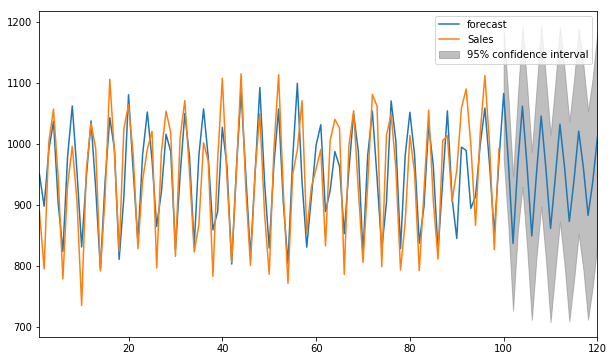

In [52]:
results_ARIMA.plot_predict(1, 120)
x=results_ARIMA.forecast(steps=120)

In [53]:
x[0]

array([1083.122121  ,  971.70580209,  836.94593842,  965.46517095,
       1062.33411236,  962.80758393,  849.26538991,  951.82607719,
       1046.12559679,  960.56998936,  861.51211428,  944.56901803,
       1032.72746515,  960.72582082,  872.85863751,  940.51058047,
       1021.30980136,  961.52644555,  883.05705264,  938.1847991 ,
       1011.44034758,  962.29627271,  892.09091305,  936.88362833,
       1002.85940748,  962.81005597,  900.03139503,  936.23967455,
        995.38617043,  963.02566084,  906.97828925,  936.04374042,
        988.87950787,  962.97027176,  913.03615639,  936.16420315,
        983.22130178,  962.69271492,  918.30502599,  936.5106839 ,
        978.30907755,  962.24416212,  922.87708884,  937.01708778,
        974.05247932,  961.67092185,  926.83584166,  937.63320626,
        970.37134027,  961.01229357,  930.25621866,  938.32018169,
        967.19442759,  960.30046862,  933.20510302,  939.04777849,
        964.45848803,  959.56119158,  935.74196709,  939.79255

This is the data forecast in dataset of Sales. Thats show us about the data forecast in the next 20 years is getting down but still have a constant graph. 

It means that sales in the next 20 years will getting down, so the company needs to make some inovation and changing the better of Sales Method to make the Sales growing up in the next 20 years.